In [3]:
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import tables as tb

In [2]:
datdir = "/home/hzhang/workspace/tmp/panda2-daq/kit-gitlab/output/injection_scan"

In [13]:
fraw = os.path.join(datdir, "20231108_192900_injection_scan.h5")
fhit = fraw[:-7] + "hit.h5"

Text(0, 0.5, '#')

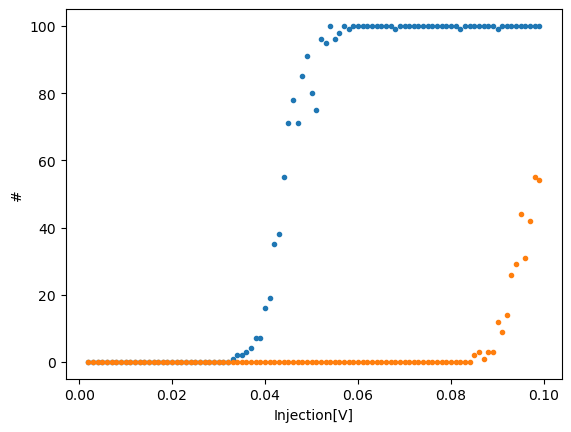

In [14]:
## get data from hit file (event_data)
with tb.open_file(fhit) as f:
    dat = f.root.event_data[:]
## get data from raw data (scan_parameters)
with tb.open_file(fraw) as f:
    param = f.root.scan_parameters[:]

## select hits from comparator0
dat0 = dat[dat['comp']==0]
## take only the first data (delete hits from the rising edges)
uni, idx= np.unique(dat0['timestamp'], return_index=True)
dat0 = dat0[idx]
## count hits per event_number
nhit = np.bincount(dat0['event_number'])

# make a plot (injection vs n of hits)
plt.plot(param['inj']/10., nhit, '.', label='faster')

## select hits from comparator1
dat1 = dat[dat['comp']==1]
#print(dat1)
uni, idx = np.unique(dat1['timestamp'], return_index=True)
dat1 = dat1[idx]
nhit1 = np.bincount(dat1['event_number']) #, minlength=len(param))
plt.plot(param['inj']/10, nhit1, '.', label='slower')

## show x-axis and y-axis and legend
plt.xlabel('Injection[V]')
plt.ylabel('#')

In [16]:
plt.plot(dat0['toa'])

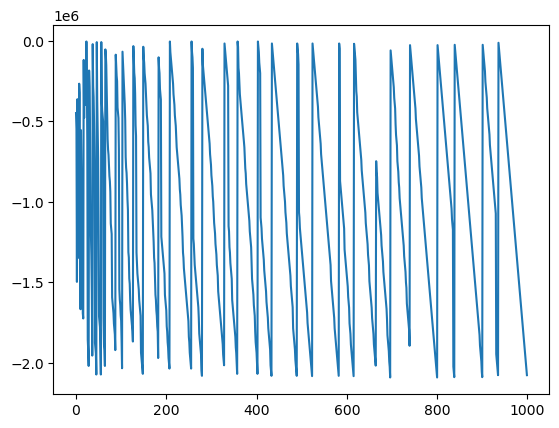

In [24]:
corr_toa = dat0['toa'] - ((dat0['timestamp']>>2)&0x1fffff)
plt.plot(corr_toa[0:1000], '')

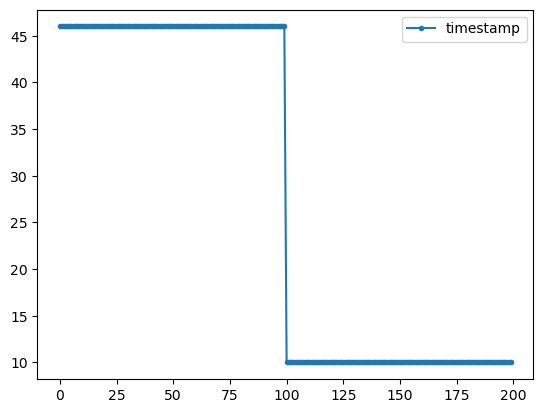

In [61]:
ts = (dat0['timestamp'][-200:]>>2)&0x3FF
ts = ts - ts[-1] + 10
#plt.plot(toa-toa[0], label='toa')
plt.plot(ts,'.-', label='timestamp' )
plt.legend()

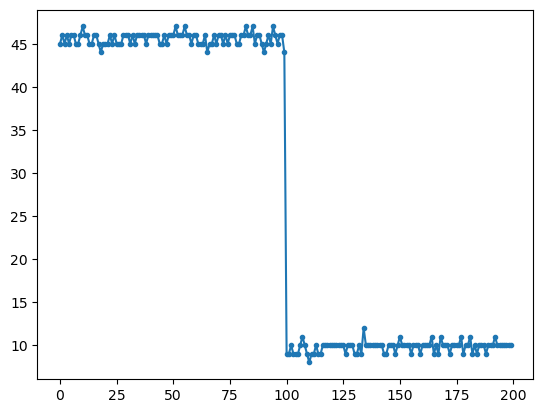

In [62]:
toa = dat0['toa'][-200:]-dat0['toa'][-1]+10
plt.plot(toa,'.-', label='toa')

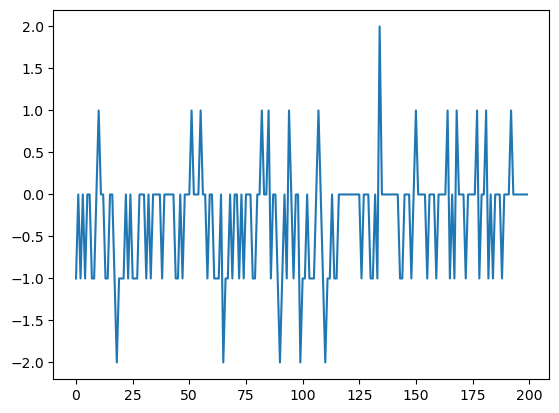

In [63]:
plt.plot(toa-ts)

In [22]:
hex(2**21-1)

'0x1fffff'

In [20]:
hex((dat0['timestamp'][1:]-dat0['timestamp'][:-1])[-1])

'0x20000'

In [45]:
hex(1024*8+1024*8)

'0x4000'

In [ ]:
## timewalk
## define the 2D array
n = 100 #2**11
nsteps = param.shape[0]
print(n, nsteps)
toa = np.empty([n, nsteps])
# for each step (event_number)
for i in range(nsteps):
    ## select hit in each event_number
    ev = dat0[dat0['event_number']==i]
    tmp = np.array([
            ev['col']==col,
            ev['row']==row])
    ev = ev[np.all(tmp, axis=0)]
    ## make a histogram in each evevent
    toa[:,i] = np.bincount(ev['toa'], minlength=n)[:n]
    #print(ev['toa'], toa[:, i])
    
# plot 
plt.imshow(toa, origin='lower', extent=(param['inj'][0]/10., param['inj'][-1]/10., 0, n*5), aspect='auto')
plt.xlabel('Injection [Vpp]')
plt.ylabel('ToA [ns]')
plt.title('Comparator1')
plt.colorbar()
plt.xlim(0.4, 0.4+0.0020)
plt.ylim(250, 375)